## Supplementary notebook for Size matters: An analytical study of the role of tissue size in spatiotemporal distribution of morphogens unveils a transition between different Reaction-Diffusion regimes.
### Alberto S. Ceccarelli 1 , Augusto Borges 1, 2, 3 & Osvaldo Chara 1,4
##### 1 Systems Biology Group, Institute of Physics of Liquids and Biological Systems, National Scientific and Technical Research Council, University of La Plata, La Plata, Argentina.
##### 2 Research Unit of Sensory Biology & Organogenesis, Helmholtz Zentrum München, Munich, Germany.
##### 3 Graduate School of Quantitative Biosciences (QBM), Munich, Germany.
##### 4 Center for Information Services and High Performance Computing, Technische Universität Dresden, Dresden, Germany.
##### *Corresponding author:
##### Osvaldo Chara
##### Center for Information Services and High Performance Computing (ZIH), Technische Universität Dresden, Nöthnitzer Straße 46, 01187 Dresden, Germany. Tel. +49 351 463-38780, E-mail: osvaldo.chara@tu-dresden.de
##### Systems Biology Group (SysBio), Institute of Physics of Liquids and Biological Systems (IFLySIB), National Scientific and Technical Research Council (CONICET) and University of La Plata, Calle 59 N 789, 1900 La Plata, Argentina. Tel. +54 221 4233283 Ext: 26, E-mail: ochara@iflysib.unlp.edu.ar Web: http://sysbioiflysib.wordpress.com/

## The next cell plots fig 8 from the paper.
#### Run the following cell to plot fig 8 from the paper and to save it as a png image.
##### Expected computational time: 12 minutes.

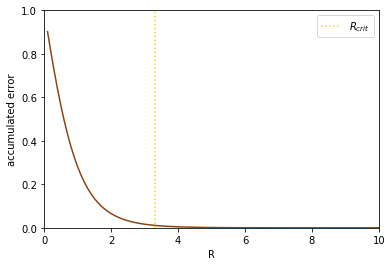

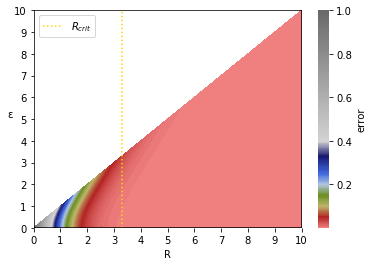

My program took 692.4568083286285 seconds to run


In [2]:
# Import libraries.

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors
from matplotlib.colors import LinearSegmentedColormap
import time
# A timer that calculates how much does the simulation take.
start_time = time.time()
# Define functons.
# Calculate the steady state spatial morphogen concentration for a finite tissue.
def cfin(x,R):
    return np.sinh(-x+R)/np.cosh(R)
# Calculate the steady state spatial morphogen concentration for an infinite domain.
def cinf(x):
    return np.exp(-x)
# Calculate the error of using the steady state spatial morphogen concentration for an infinite domain with respect of the steady state spatial morphogen concentration for a finite tissue.
def error(x,R):
    return (cinf(x)-cfin(x,R))
# Calculate the accumulated error using the simpson method to simulate the integral numerically.
def accumulated_error(R):
    n=100
    h=R/n
    aux=0
    for i in range(1,50+1,1):
        aux+=error((2*i-2)*R/n,R)+4*error((2*i-1)*R/n,R)+error((2*i)*R/n,R)
    aux=aux*h/3
    return aux

# Define parameters and arrays necesary for the simulation.
dr=0.1
Rmax = 10
lengths = np.arange(dr,Rmax+dr,dr)
acc_er=[]
# Loop over every R
for ri in lengths:
#     Calculates the accumulated error for every R
    acc_er.append(accumulated_error(ri)/ri)
# Plot accumulated error vs R
plt.plot(lengths,acc_er, color="saddlebrown")
# Add the position of Rcritic
plt.axvline(x=3.3, color="gold", ls=":", label="$R_{crit}$")
# Set axis name and save the figure.
plt.legend()
plt.xlabel("R")
plt.ylabel("accumulated error")
plt.xlim(0, 10)
plt.ylim(0, 1)
plt.savefig("fig8-b.png", dpi=500)
plt.show()
plt.close()




# Define parameters and arrays necesary for the simulation.
dr=0.001
Rmax = 10
lengths = np.arange(0,Rmax+dr,dr)
positions = np.arange(0,Rmax+dr,dr)
errores = np.empty((int(Rmax/dr+1),int(Rmax/dr+1)))
errores[:]=np.nan

# Loop over every R
for R in lengths:
#     Loop over every position.
    for x in positions:
        if x<=R:
#             Calculate the error.
            errores[int(x/dr),int(R/dr)]=error(x,R)
# Creates custom colormap for the heatmap.
vmax = 10.0
cmap = LinearSegmentedColormap.from_list('mycmap', [(0 / vmax, 'lightcoral'),
                                                    (0.5 / vmax, 'firebrick'),
                                                    (1 / vmax, 'darkkhaki'),
                                                    (1.5 / vmax, 'olivedrab'),
                                                    (2 / vmax, 'lightsteelblue'),
                                                    (2.5 / vmax, 'royalblue'),
                                                    (3.3 / vmax, 'midnightblue'),
                                                    (4 / vmax, 'lightgrey'),
                                                    (10 / vmax, 'dimgrey')]
                                        )
# Creates heatmap of error vs R and position.
ax = sns.heatmap(errores,xticklabels=lengths, yticklabels=positions, cmap=cmap,cbar_kws={'label': 'error'})
# Set axis values and names.
new_labels=[0,1,2,3,4,5,6,7,8,9,10]
new_ticks = np.linspace(0, int(Rmax/dr), len(new_labels))
ax.set_xticks(new_ticks)
ax.set_xticklabels(new_labels)
ax.set_yticks(new_ticks)
ax.set_yticklabels(new_labels)
ax.invert_yaxis()
plt.xticks(rotation=0)
plt.xlabel("R")
plt.ylabel("ε",rotation=0)
# Add the position of Rcrit.
plt.axvline(x=3.3/dr, color="gold", ls=":",label="$R_{crit}$")
plt.legend(loc=2)
plt.axvline(x=0, color="black")
plt.axvline(x=Rmax/dr, color="black")
plt.axhline(y=0, color="black")
plt.axhline(y=Rmax/dr, color="black")
# Saves the figure.
plt.savefig("fig8-a.png", dpi=500)
plt.show()
plt.close()
# Shows on screen how long the program took to run.
print("My program took "+str(time.time() - start_time)+" seconds to run")